# Instituto Tecnologico de Durango

## Analítica de Datos en las Organizaciones

## Alumna: Brenda Raquel Sanchez Alanis

## Docente: José Gabriel Rodríguez Rivas

## Unidad ll

## Laboratorio 5

In [3]:
#Crear la base de datos de InternetSeed
!sqlite3 ./Data/InternetSpeed.db ".databases"

main: C:\Users\Brenda\AnalÃ­tica de Datos de las Organizaciones\Data\InternetSpeed.db r/w


In [4]:
# Intalara csvkit 
!pip install csvkit

## Parte 2: Conectese a la base de datos 

In [13]:
 # esta es la biblioteca para comunicarse con la base de datos 
import  sqlite3 
import  pandas  as  pd 
# esta es una biblioteca para la visualización de datos 
from matplotlib  import  pyplot  as  plt 
# esto quiere decir que queremos que nuestros gráficos sean parte de esta página , y no se abrió en una nueva ventana 
%matplotlib inline

In [14]:
# Conectese a la base de datos que acaba de crear, y luego crea un cursor que apunte a la base de datos
con = sqlite3.connect('InternetSpeed.db')
cur = con.cursor()

In [22]:
# Ejecutar una consulta 
# complete la consulta con el campo que desea seleccionar, la tabla de la que desea seleccionar el campo,
# y el campo por el que desea que se ordenen los resultados.
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10;'  
cur.execute(query)

In [27]:
# El resultado de la consulta se almacena en cur. Necesitamos iterar sobre ella para ver el resultado
for row in cur:
    print (row)

('2016-11-26 11:00:00.000000',)
('2016-11-24 03:00:00.000000',)
('2016-11-29 04:30:00.000000',)
('2016-11-23 11:30:00.000000',)
('2016-12-02 04:00:00.000000',)
('2016-12-08 10:30:00.000000',)
('2016-11-23 10:00:00.000000',)
('2016-12-05 10:30:00.000000',)
('2016-12-10 10:30:00.000000',)
('2016-11-24 06:30:00.000000',)


In [28]:
#Nota: Necesitamos ordenar la tabla que contiene la medición según la columna DateTime. Esto es porque SQL no posee un orden intrínseco de las filas, y estamos lidiando con una serie de tiempo, que sin el orden correcto, no tiene sentido. La selección de una muestra aleatoria de filas quitaría el componente temporal:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for row in cur:
    print (row)

('2016-11-25 07:30:00.000000',)
('2016-11-23 19:00:00.000000',)
('2016-12-10 14:00:00.000000',)
('2016-11-27 11:00:00.000000',)
('2016-11-24 01:00:00.000000',)
('2016-11-25 19:30:00.000000',)
('2016-11-29 13:30:00.000000',)
('2016-12-05 23:00:00.000000',)
('2016-12-02 21:30:00.000000',)
('2016-11-26 05:00:00.000000',)


#### Paso 2: Enfoquese en una porcion de los datos 


In [31]:
# Necesitamos tener un cursor apuntando a una tabla para esta operacion 
query  =  'SELECT * FROM LA_wifi_speed_UK LIMIT 1' 
cur.execute (query)

In [32]:
# El nombre de las columnas de la tabla se almacena en el campo description del cursor.
# visualizando las primeras 10 filas de la descripción del campo 
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [41]:
# bucle sobre el encabezado y almacenarlos en una lista de 
columns = [member[0] for member in cur.description]

# ignorar la columna de índice 
columns = columns[1:]


In [42]:
# a) Obtenga los nombres de area
# Utilice la comprensión de lista para dar vuelta la lista que contiene los nombres de las columnas de la tabla y quite los sufijos "_p", "_d" y "_u"
#Eliminar sufijo '_p'
columns = [c.replace('_p', '') for c in columns]
#Eliminar sufijo '_d'
columns = [c.replace('_d', '') for c in columns]
#Eliminar sufijo '_u'
columnas = [c.replace('_u','') for c in columns]

#Esta operacion es para eliminar 
columns = list(set(columns))

In [43]:
# visualizar las primeras 10 áreas 
columns[:10]

['E07000173',
 'E07000092',
 'E07000105_u',
 'E07000168_u',
 'E06000042_u',
 'E07000043_u',
 'E08000008_u',
 'E07000215_u',
 'E06000007_u',
 'E09000008']

In [45]:
# Para comprender mejor los datos en la base de datos es preciso visualizar una parte de ellos. En particular, queremos seleccionar las tres estadísticas de un área. En primer lugar, escojamos la primer área que tenemos en el conjunto de datos:
area = columns[0]
print (area)

E07000173


In [ ]:
# Ahora queremos mostrar los datos en relación con el área E07000101. Necesitamos seleccionar las columnas que contienen las 
# tres mediciones para esta área. Para hacerlo, es necesario manipular las cadenas nuevamente.

#Una forma de formatear una cadena es:

# 'We are considering {} area and {} statistics'.format(1, 3)

In [47]:
# Debemos agregar los sufijos de nuevo para obtener los nombres de columna correctos. Lo primero que debemos hacer es crear un diccionario que asocie el nombre completo de la medición al sufijo. También será útil escribir una leyenda significativa en el diagrama.
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# tenemos los sufijos como las claves del 
print (suffix.keys())
# tenemos los nombres completos como los valores del 
print (suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000173')

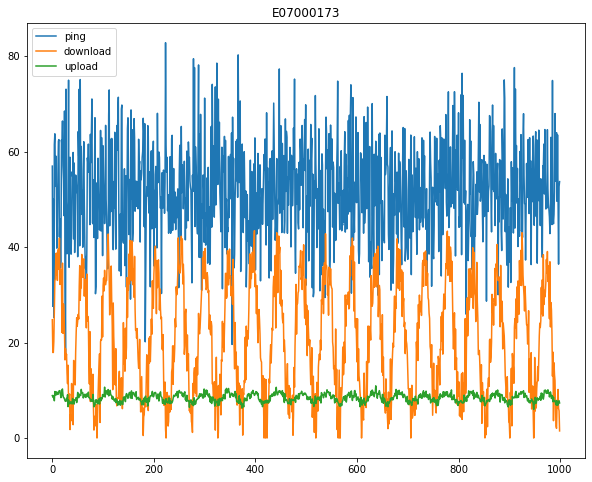

In [49]:
# b) Escriba la consulta para seleccionar las columnas relevantes 
area = columns[0]
plt.figure(figsize=(10, 8))

# Traza cada variable en sufijo.keys() para cada area
for s in suffix.keys():
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime;'.format(area, s)
    
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)


# Parte 3: Manipule los datos con pandas 

#### Paso 1: Convierta todas las mediciones a promedios 

In [51]:
# a) cree un dataframe vacio con columnas especificas 
#  ['Area', 'Average_p', 'Average_u', 'Average_d']
new_columns =  ['Area', 'Average_p', 'Average_u', 'Average_d']
df = pd.DataFrame(columns = new_columns)


In [75]:
# b) Calcule los promedios 

#Esto tomara un tiempo....
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'. format(columns[i],s)
        
        cur.execute(query)
        
        mean = cur.fetchone()
        tmp_list.append(mean[0])
#Agregar las columnas al DataFrame vacio 
df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
#Visualizar el encabezado de marco de datos aqui 
df.head(5)

C:\Users\Brenda\AppData\Local\Temp\ipykernel_29368\3201138093.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)


,Area,Average_p,Average_u,Average_d
0,E07000140,51.647585,20.921209,8.349087
1,E07000140,51.647585,20.921209,8.349087
2,E07000173,51.776644,21.089611,8.443025
3,E07000092,51.670707,21.083552,8.328357
4,E07000105_u,0.0,0.0,0.0


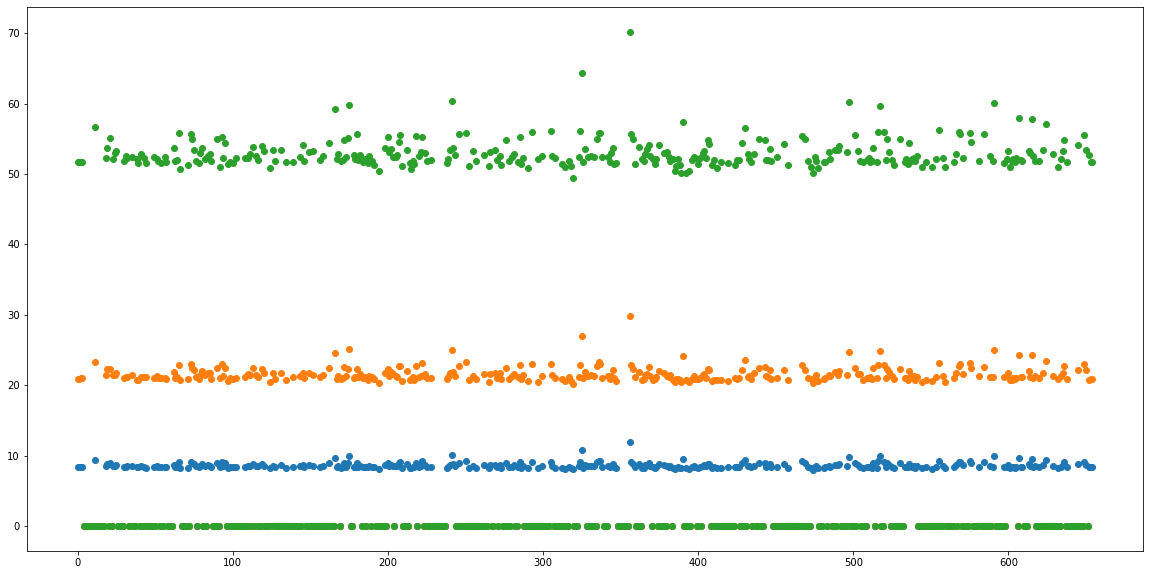

In [74]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df['Average_d'], 'o')
plt.plot(df.index, df['Average_u'], 'o')
plt.plot(df.index, df['Average_p'], 'o')

In [59]:
# c) Guarde el trabajo
# Guarde el nuevo dataframe en una tabla de la base de datos InternetSpeed

#Asegurece de soltar la tabla primero si ya existe 
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass
# Guarde la tabla del marco de datos en una tabla SQl 
df.to_sql('average_speed',con)


2

In [60]:
# simplemente verificando que todo funcionó bien: seleccione todo de la tabla que acabamos de crear 
# y luego imprima las dos primeras filas del resultado
query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)

# imprime el primer registro obtenido 
print ( cur . fetchone ()) 
# imprime el siguiente registro obtenido 
print ( cur . fetchone ())

(0, 'E07000140', 51.64758453078289, 20.921209178435927, 8.349087127348026)
(1, 'E07000140', 51.64758453078289, 20.921209178435927, 8.349087127348026)


# Parte 4: Una las tablas con pandas 

#### Paso 1: Obtenga informacion relevante 

In [63]:
# a) cree la tabla de la poblacion 
#primero cierre el archivo de la base de datos, de lo contrario, el comando csvsql externo no puede usar
con.close()

In [78]:
#reabrir el archivo DB 
con = sqlite3.connect('InternetSpeed.db') 

cur  =  con. cursor ()

In [79]:
# b) compruebe que todo haya funcionado 

#Para comprobar que todo haya funcionado y tener una idea de qué hay dentro de esta nueva tabla, seleccione las primeras 10 filas e imprímalas.
query = 'SELECT * FROM LA_population LIMIT 10'

cur.execute(query)

for row in cur:
# imprime el primer registro obtenido
    print(row)

('Aberdeen City', 'S12000033', 222793.0)
('Aberdeenshire', 'S12000034', 252973.0)
('Adur', 'E07000223', 61182.0)
('Allerdale', 'E07000026', 96422.0)
('Amber Valley', 'E07000032', 122309.0)
('Angus', 'S12000041', 115978.0)
('Antrim and Newtownabbey', 'N09000001', 138567.0)
('Ards and North Down', 'N09000011', 156672.0)
('Argyll and Bute', 'S12000035', 88166.0)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693.0)


In [71]:
# c) Ejecute la consulta UNIR e imprima las primeras 10 filas del resultado.
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print(row)
    
    k+=1

(0, 'E07000140', 51.64758453078289, 20.921209178435927, 8.349087127348026, 'South Holland', 'E07000140', 88270.0)
(1, 'E07000140', 51.64758453078289, 20.921209178435927, 8.349087127348026, 'South Holland', 'E07000140', 88270.0)


#### Reflexion

In [ ]:
# La practica 5 nos muestra como es que podemos conectar SQL  de internet 
# primero que nada configuramos la base de datos y para esto ya lo tenemos configurado con sqlite3 y csvsql
# segundo nos conectaremos a la base de datos para este paso se usarios algunas importaciones de bibliotecas que son:
# sqlite3, pandas as pd y pyplot as plt 
# pusimos el nombre de la base de datos que quisimos conectar en este caso fue InternetSpeed, realizamos despues una consulta 
# codificamos la celda ya que el resultado de la cunsulta se almaceno en cur.
# despues hicimos una seleccion a la muestra aleatoria de filas y quitamos el componente temporal con otra consulta a nuestra base LA_wifi_speed_UK
# realizamos otra consulta para tener un cursor que apunte a una tabla para la operacion
# visualizamos las primeras 10 filas de la descripcion del campo con el comando description 
# despues realizamos un bucle sobre el encabezado y lo almacenamos en una lista de columnas 
# despues obtuvimos los nombres de las areas mediante los sufijos y visualisamos por primeros 10
# escribimos con el comando for para trazar las variables en sufijo para cada area 
# en tercer lugar manipulamos los datos con la biblioteca pandas, y de esta manera creamos un dataframe vacio con columnas especificas en este caso 
# 'Area', 'Average_p', 'Average_u', 'Average_d' con el comando pd.dataframe, despues calculamos los promedios, consultando estos mismos y en la siguiente linea con el 
# comando plot() los mostramos para cada area una vez finalizado esto guardamos el trabajo realizado con el 
# y por ultimo trabajamos con una tabla mas con pandas la cual nos dice como obtener informacion relevante
# de igual manera primmero creamos la tabla de poblacion, primero cerraremos el archivo de la base de datos y despues lo volveremos a reabrir 
# comprobamos que todo haya funcionado haciendo una consulta asi la tabla LA_population y ejecutamos la consulta UNIR y imprimimos las primeras 10 filas del resultado.
